#### import libraries 

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt  
import seaborn as sns

In [68]:
print("All libraries imported successfully!")

All libraries imported successfully!


# load data set

In [69]:
df = pd.read_csv('heart.csv')
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# check for missing values

In [70]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# prepare features and target the define x and y

In [71]:
X = df.drop('target', axis=1)
y = df['target']

# feature scaling

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split -  split the data :training and testing

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Train the logistics model

In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model the prediction and evaluate the model

In [75]:
y_pred = model.predict(X_test)

# Evaluate the model -  evaluate the performance of the trained model

In [76]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.881578947368421

Confusion Matrix:
 [[30  5]
 [ 4 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



# Visualize the logistic regresstion scaling the age range using the same scaler as used for X_train and predict the probability for the class

In [77]:

import numpy as np
import matplotlib.pyplot as plt
age_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300).reshape(-1, 1)
mean_values = np.mean(X_train, axis=0)
age_range_full = np.hstack([age_range, np.tile(mean_values[1:], (age_range.shape[0], 1))])
age_range_scaled = scaler.transform(age_range_full)  
probs = model.predict_proba(age_range_scaled)[:, 1]

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Plot the logistic regression curve

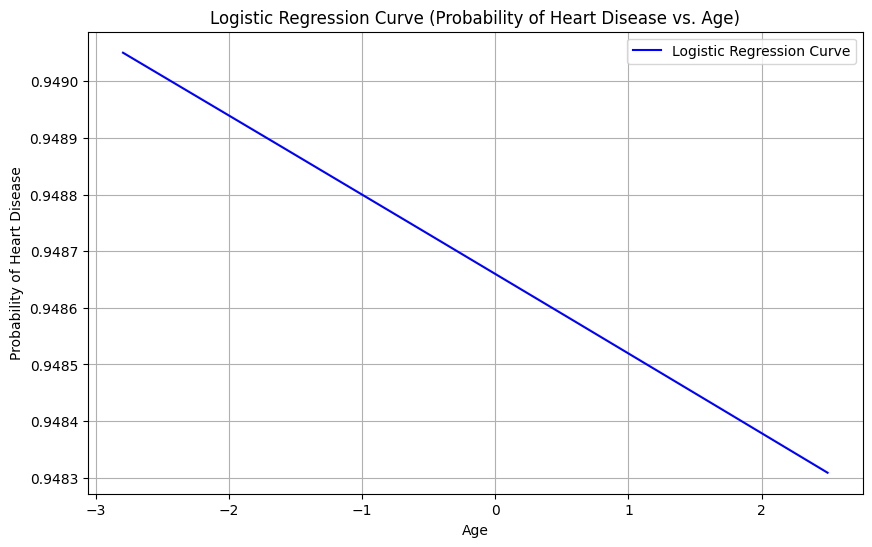

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(age_range, probs, color='blue', label='Logistic Regression Curve')
plt.title('Logistic Regression Curve (Probability of Heart Disease vs. Age)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.grid(True)
plt.legend(loc='best')
plt.show()